## IMDB Dataset

In [218]:
import pandas as pd
import numpy as np
import re
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


### Q1 How many different genre are on the dataset?

In [219]:
movies.shape

(979, 6)

In [220]:
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [221]:
movies['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [222]:
Q1 = len(movies['genre'].unique())
Q1

16

### Q2 Create a list with the genres

In [223]:
Q2 = list(movies['genre'].unique())
Q2

['Crime',
 'Action',
 'Drama',
 'Western',
 'Adventure',
 'Biography',
 'Comedy',
 'Animation',
 'Mystery',
 'Horror',
 'Film-Noir',
 'Sci-Fi',
 'History',
 'Thriller',
 'Family',
 'Fantasy']

### Q3 What is the most popular genre?

In [224]:
#index was needed....value returns the top value
Q3 = movies['genre'].value_counts().index[0]

Q3

'Drama'

### Q4 How many 'Crime' movies are on the dataframe?

In [225]:
#the last bracketed ['genre'] is necessary otherwise it counts the number of elements in each column where this is true
Q4 = movies[movies['genre'] =='Crime'].count()['genre']

Q4

124

In [226]:
#just playing around with groupby
movie_genres = movies.groupby("genre").agg('count')['title']
movie_genres

genre
Action       136
Adventure     75
Animation     62
Biography     77
Comedy       156
Crime        124
Drama        278
Family         2
Fantasy        1
Film-Noir      3
History        1
Horror        29
Mystery       16
Sci-Fi         5
Thriller       5
Western        9
Name: title, dtype: int64

### Q5 Change the index of the dataframe to "title"

In [227]:
#remember to use parenthesis, not brackets
movies_by_title = movies.set_index('title')

Q5 = movies_by_title

Q5.head()

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [228]:
movies['actors_list'][0]

"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']"

In [229]:
#note: this is a string, not a list!
type(movies['actors_list'][0])

str

### Q6 Show a list with all the movies of Robert De Niro

In [231]:
def find_movies_by_actor(name):
    #dropna because it returned NaN for all values in each row without his name
    return list(movies.where(movies['actors_list'].str.contains(name)).dropna()['title'])

Q6 = find_movies_by_actor('Robert De Niro')

Q6

['The Godfather: Part II',
 'Goodfellas',
 'Once Upon a Time in America',
 'Taxi Driver',
 'Raging Bull',
 'Heat',
 'Casino',
 'The Deer Hunter',
 'Brazil',
 'The Untouchables',
 'Silver Linings Playbook',
 'A Bronx Tale',
 'Awakenings',
 'The King of Comedy',
 'Midnight Run',
 'Sleepers',
 'The Mission',
 'Mean Streets']

In [232]:
#cleaning up the last column's data with regex...second apply would make it an actual list of actors
movies['actors_list'] = (movies['actors_list'].apply(lambda x: re.sub('u\'|\'|\[|\]','', x))
                                            # .apply(lambda x: re.split(', ', x))
                         )

movies['actors_list'].head()

0          Tim Robbins, Morgan Freeman, Bob Gunton
1             Marlon Brando, Al Pacino, James Caan
2         Al Pacino, Robert De Niro, Robert Duvall
3      Christian Bale, Heath Ledger, Aaron Eckhart
4    John Travolta, Uma Thurman, Samuel L. Jackson
Name: actors_list, dtype: object

In [233]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"Tim Robbins, Morgan Freeman, Bob Gunton"
1,9.2,The Godfather,R,Crime,175,"Marlon Brando, Al Pacino, James Caan"
2,9.1,The Godfather: Part II,R,Crime,200,"Al Pacino, Robert De Niro, Robert Duvall"
3,9.0,The Dark Knight,PG-13,Action,152,"Christian Bale, Heath Ledger, Aaron Eckhart"
4,8.9,Pulp Fiction,R,Crime,154,"John Travolta, Uma Thurman, Samuel L. Jackson"


### Q7 Print a table with all the comedies by Steve Carell. Sort from shorter to longer

In [234]:
#engine='python' is necessary
Q7 = (movies.query('"Comedy" in genre and actors_list.str.contains("Steve Carell")', engine='python')
            .sort_values('duration')
     )

Q7

,star_rating,title,content_rating,genre,duration,actors_list
960,7.4,The Way Way Back,PG-13,Comedy,103,"Steve Carell, Toni Collette, Allison Janney"
934,7.4,"Crazy, Stupid, Love.",PG-13,Comedy,118,"Steve Carell, Ryan Gosling, Julianne Moore"


### Q8 Print a table with the movies with the highest, and the lowest rating acted by Diane Keaton.

In [268]:
#engine='python' is necessary
Q8 = (movies.query('actors_list.str.contains("Diane Keaton")', engine='python')
            .sort_values('star_rating')
            .reset_index()
            .drop(movies.index[1:len(Q8['star_rating'])-1])
     )

Q8

,index,title,star_rating,Felipe's coefficient,content_rating,genre,duration,actors_list
0,956,Manhattan Murder Mystery,7.4,16.73,PG,Comedy,104,"Woody Allen, Diane Keaton, Jerry Adler"
3,208,Annie Hall,8.1,19.46,PG,Comedy,93,"Woody Allen, Diane Keaton, Tony Roberts"


### Q9 Make a table with the average time per genre, sorted in descending order.

In [236]:
movie_genre_times = (movies.groupby("genre")
                           .agg({'duration':np.nanmean})
                           .sort_values(['duration'], ascending = False)
                    )
Q9 = movie_genre_times
Q9

,duration
genre,
Western,136.666667
Adventure,134.840000
Biography,131.844156
Drama,126.539568
Action,126.485294
Crime,122.298387
Mystery,115.625000
Thriller,114.200000
Fantasy,112.000000


### Q10 Who is the leading actress in Morgan Freeman only PG-13 movie with a rating above 8 stars?

In [237]:
#engine='python' is necessary
df = movies.query('star_rating > 8 and actors_list.str.contains("Morgan Freeman") and "PG-13" in content_rating', engine='python')

#just playing around with regex to do this
Q10 = df['actors_list'].str.extract(r'(^[\w]*\s[\w]*)')
Q10

,0
227,Hilary Swank


### Q11 Felipe's coefficient is well known as the perfect movie score. Create a new column between "star_rating" and content_rating in the dataframe where you will add Felipe's coefficient for each movie. Round Felipe's coefficient, and sort the data from greatest to lowest Felipe's coefficient. The equation is:

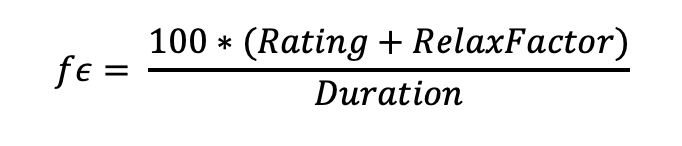

In [238]:
from IPython.display import Image
Image(filename='felipe_movie_equation.png') 

### The RelaxFactor is equal to the value corresponding to each genre in the following dictionary.

In [239]:
RelaxFactor={'Western': 3, 'Adventure': 4, 'Biography': 4, 'Drama': 7, 'Action': 8, 'Crime': 5, 'Mystery': 4, 'Thriller': 5,
 'Fantasy': 6, 'Sci-Fi': 6, 'Comedy' : 10, 'Family': 7, 'Horror': 2, 'Film-Noir': 4, 'Animation': 7, 'History' : 6}

In [253]:
# used apply function to create a new column 
movies['Felipe\'s coefficient'] = movies.apply(lambda row: np.around(100*(row.star_rating + RelaxFactor[row.genre])/row.duration, decimals = 2), axis = 1)
                                  

#reorder the columns
movies = movies[['title', 'star_rating', 'Felipe\'s coefficient', 'content_rating', 'genre', 'duration', 'actors_list']]


movies.sort_values(['Felipe\'s coefficient'], ascending = False).head()

,title,star_rating,Felipe's coefficient,content_rating,genre,duration,actors_list
88,The Kid,8.4,27.06,NOT RATED,Comedy,68,"Charles Chaplin, Edna Purviance, Jackie Coogan"
293,Duck Soup,8.1,26.62,PASSED,Comedy,68,"Groucho Marx, Harpo Marx, Chico Marx"
389,Freaks,8.0,23.44,UNRATED,Drama,64,"Wallace Ford, Leila Hyams, Olga Baclanova"
535,Zelig,7.8,22.53,PG,Comedy,79,"Woody Allen, Mia Farrow, Patrick Horgan"
622,The Dinner Game,7.7,22.12,PG-13,Comedy,80,"Thierry Lhermitte, Jacques Villeret, Francis H..."
